In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
transform = transforms.ToTensor()

In [64]:
train_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset-3', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset-3', train=False, download=True, transform=transform)

In [65]:
print(len(train_data_set))
print(train_data_set)
print()
print(len(test_data_set))
print(test_data_set)

60000
Dataset MNIST
    Number of datapoints: 60000
    Root location: deep-learning/hw-1/dataset-3
    Split: Train
    StandardTransform
Transform: ToTensor()

10000
Dataset MNIST
    Number of datapoints: 10000
    Root location: deep-learning/hw-1/dataset-3
    Split: Test
    StandardTransform
Transform: ToTensor()


In [66]:
train_loader = DataLoader(train_data_set, batch_size=500, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=100, shuffle=False)

In [67]:
def count_parameters(model):
    return sum(param.numel() for param in model.parameters() if param.requires_grad)

# Model 1 - 1645 parameters

In [68]:
class ModelOne(nn.Module):
    def __init__(self, in_features=784, h1=2, h2=5, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [69]:
model_one = ModelOne()
criterion_one = nn.CrossEntropyLoss()
optimizer_one = torch.optim.Adam(model_one.parameters(), lr=0.001)

In [70]:
print(model_one)
model_one_params = count_parameters(model_one)
print(model_one_params)

ModelOne(
  (fc1): Linear(in_features=784, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=10, bias=True)
)
1645


In [71]:
epochs = 30
train_correct_model_one = []
test_correct_model_one = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_one(X_train.view(500, -1))
        loss = criterion_one(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_one.zero_grad()
        loss.backward()
        optimizer_one.step()
        
    train_losses_model_one = loss
    train_correct_model_one.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_one(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_one(y_val, y_test)
    test_losses_model_one = loss
    test_correct_model_one.append(test_corr)

train_losses_model_one = train_losses_model_one.detach().numpy()

In [72]:
for t in train_correct_model_one:
    trn_accu_model_one = t / 600
    
print(trn_accu_model_one)

tensor(56.5100)


In [134]:
for t in train_correct_model_one:
    tst_accu_model_one = t / 600
    
print(tst_accu_model_two)

tensor(56.5100)


# Model 2 - 3240 parameters

In [73]:
class ModelTwo(nn.Module):
    def __init__(self, in_features=784, h1=4, h2=6, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [74]:
model_two = ModelTwo()
criterion_two = nn.CrossEntropyLoss()
optimizer_two = torch.optim.Adam(model_two.parameters(), lr=0.001)

In [75]:
print(model_two)
model_two_params = count_parameters(model_two)
print(model_two_params)

ModelTwo(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=10, bias=True)
)
3240


In [76]:
epochs = 30
train_correct_model_two = []
test_correct_model_two = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_two(X_train.view(500, -1))
        loss = criterion_two(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_two.zero_grad()
        loss.backward()
        optimizer_two.step()

    train_losses_model_two = loss
    train_correct_model_two.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_two(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_two(y_val, y_test)
    test_losses_model_two = loss
    test_correct_model_two.append(test_corr)

train_losses_model_two = train_losses_model_two.detach().numpy()

In [77]:
for t in train_correct_model_two:
    trn_accu_model_two = t / 600
    
print(trn_accu_model_two)

tensor(87.2817)


In [78]:
for t in test_correct_model_two:
    tst_accu_model_two = t / 100
    
print(tst_accu_model_two)

tensor(87.3800)


# Model 3 - 8280 parameters

In [79]:
class ModelThree(nn.Module):
    def __init__(self, in_features=784, h1=10, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [80]:
model_three = ModelThree()
criterion_three = nn.CrossEntropyLoss()
optimizer_three = torch.optim.Adam(model_three.parameters(), lr=0.001)

In [81]:
print(model_three)
model_three_params = count_parameters(model_three)
print(model_three_params)

ModelThree(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)
8280


In [82]:
epochs = 30
train_correct_model_three = []
test_correct_model_three = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_three(X_train.view(500, -1))
        loss = criterion_three(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_three.zero_grad()
        loss.backward()
        optimizer_three.step()

    train_losses_model_three = loss
    train_correct_model_three.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_three(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_three(y_val, y_test)
    test_losses_model_three = loss
    test_correct_model_three.append(test_corr)

train_losses_model_three = train_losses_model_three.detach().numpy()

In [83]:
for t in train_correct_model_three:
    trn_accu_model_three = t / 600
    
print(trn_accu_model_three)

tensor(94.5733)


In [84]:
for t in test_correct_model_three:
    tst_accu_model_three = t / 100
    
print(tst_accu_model_three)

tensor(94.1000)


# Model 4 - 16950 parameters

In [85]:
class ModelFour(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [86]:
model_four = ModelFour()
criterion_four = nn.CrossEntropyLoss()
optimizer_four = torch.optim.Adam(model_four.parameters(), lr=0.001)

In [ ]:
print(model_four)
model_four_params = count_parameters(model_four)
print(model_four_params)

In [88]:
epochs = 30
train_correct_model_four = []
test_correct_model_four = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_four(X_train.view(500, -1))
        loss = criterion_four(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_four.zero_grad()
        loss.backward()
        optimizer_four.step()

    train_losses_model_four = loss
    train_correct_model_four.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_four(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_four(y_val, y_test)
    test_losses_model_four = loss
    test_correct_model_four.append(test_corr)

train_losses_model_four = train_losses_model_four.detach().numpy()

In [89]:
for t in train_correct_model_four:
    trn_accu_model_four = t / 600

print(trn_accu_model_four)

tensor(97.0867)


In [90]:
for t in test_correct_model_four:
    tst_accu_model_four = t / 100

print(tst_accu_model_four)

tensor(95.9000)


# Model 5 - 44140 parameters

In [91]:
class ModelFive(nn.Module):
    def __init__(self, in_features=784, h1=50, h2=80, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [92]:
model_five = ModelFive()
criterion_five = nn.CrossEntropyLoss()
optimizer_five = torch.optim.Adam(model_five.parameters(), lr=0.001)

In [ ]:
print(model_five)
model_five_params = count_parameters(model_five)
print(model_five_params)

In [94]:
epochs = 30
train_correct_model_five = []
test_correct_model_five = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_five(X_train.view(500, -1))
        loss = criterion_five(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_five.zero_grad()
        loss.backward()
        optimizer_five.step()

    train_losses_model_five = loss
    train_correct_model_five.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_five(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_five(y_val, y_test)
    test_losses_model_five = loss
    test_correct_model_five.append(test_corr)

train_losses_model_five = train_losses_model_five.detach().numpy()


In [95]:
for t in train_correct_model_five:
    trn_accu_model_five = t / 600

print(trn_accu_model_five)

tensor(99.2033)


In [96]:
for t in test_correct_model_five:
    tst_accu_model_five = t / 100

print(tst_accu_model_five)

tensor(97.3900)


# Model 6 - 91830 parameters

In [97]:
class ModelSix(nn.Module):
    def __init__(self, in_features=784, h1=100, h2=120, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [98]:
model_six = ModelSix()
criterion_six = nn.CrossEntropyLoss()
optimizer_six = torch.optim.Adam(model_six.parameters(), lr=0.001)

In [ ]:
print(model_six)
model_six_params = count_parameters(model_six)
print(model_six_params)

In [100]:
epochs = 30
train_correct_model_six = []
test_correct_model_six = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_six(X_train.view(500, -1))
        loss = criterion_six(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_six.zero_grad()
        loss.backward()
        optimizer_six.step()

    train_losses_model_six = loss
    train_correct_model_six.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_six(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_six(y_val, y_test)
    test_losses_model_six = loss
    test_correct_model_six.append(test_corr)

train_losses_model_six = train_losses_model_six.detach().numpy()


In [101]:
for t in train_correct_model_six:
    trn_accu_model_six = t / 600

print(trn_accu_model_six)

tensor(99.9200)


In [102]:
for t in test_correct_model_six:
    tst_accu_model_six = t / 100

print(tst_accu_model_six)

tensor(97.8600)


# Model 7 - 160410 parameters

In [103]:
class ModelSeven(nn.Module):
    def __init__(self, in_features=784, h1=180, h2=100, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [104]:
model_seven = ModelSeven()

criterion_seven = nn.CrossEntropyLoss()
optimizer_seven = torch.optim.Adam(model_seven.parameters(), lr=0.001)

In [ ]:
print(model_seven)
model_seven_params = count_parameters(model_seven)
print(model_seven_params)

In [106]:
epochs = 30
train_correct_model_seven = []
test_correct_model_seven = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_seven(X_train.view(500, -1))
        loss = criterion_seven(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_seven.zero_grad()
        loss.backward()
        optimizer_seven.step()

    train_losses_model_seven = loss
    train_correct_model_seven.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_seven(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_seven(y_val, y_test)
    test_losses_model_seven = loss
    test_correct_model_seven.append(test_corr)

train_losses_model_seven = train_losses_model_seven.detach().numpy()

In [107]:
for t in train_correct_model_seven:
    trn_accu_model_seven = t / 600

print(trn_accu_model_seven)

tensor(99.9717)


In [108]:
for t in test_correct_model_seven:
    tst_accu_model_seven = t / 100

print(tst_accu_model_seven)

tensor(97.7800)


# Model 8 - 396210 parameters

In [109]:
class ModelEight(nn.Module):
    def __init__(self, in_features=784, h1=400, h2=200, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [110]:
model_eight = ModelEight()

criterion_eight = nn.CrossEntropyLoss()
optimizer_eight = torch.optim.Adam(model_eight.parameters(), lr=0.001)

In [129]:
print(model_eight)
model_eight_params = count_parameters(model_eight)
print(model_seven_params)

ModelEight(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=10, bias=True)
)
654310


In [112]:
epochs = 30
train_correct_model_eight = []
test_correct_model_eight = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_eight(X_train.view(500, -1))
        loss = criterion_eight(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_eight.zero_grad()
        loss.backward()
        optimizer_eight.step()

    train_losses_model_eight = loss
    train_correct_model_eight.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_eight(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_eight(y_val, y_test)
    test_losses_model_eight = loss
    test_correct_model_eight.append(test_corr)

train_losses_model_eight = train_losses_model_eight.detach().numpy()

In [113]:
for t in train_correct_model_eight:
    trn_accu_model_eight = t / 600

print(trn_accu_model_eight)

tensor(100.)


In [114]:
for t in test_correct_model_eight:
    tst_accu_model_eight = t / 100

print(tst_accu_model_eight)

tensor(98.2000)


# Model 9 - 654310 parameters

In [115]:
class ModelNine(nn.Module):
    def __init__(self, in_features=784, h1=600, h2=300, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [116]:
model_nine = ModelNine()

criterion_nine = nn.CrossEntropyLoss()
optimizer_nine = torch.optim.Adam(model_nine.parameters(), lr=0.001)

In [128]:
print(model_nine)
model_nine_params = count_parameters(model_nine)
print(model_nine_params)

ModelNine(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=300, bias=True)
  (out): Linear(in_features=300, out_features=10, bias=True)
)
654310


In [118]:
epochs = 30
train_correct_model_nine = []
test_correct_model_nine = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_nine(X_train.view(500, -1))
        loss = criterion_nine(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_nine.zero_grad()
        loss.backward()
        optimizer_nine.step()

    train_losses_model_nine = loss
    train_correct_model_nine.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_nine(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion_nine(y_val, y_test)
    test_losses_model_nine = loss
    test_correct_model_nine.append(test_corr)

train_losses_model_nine = train_losses_model_nine.detach().numpy()

In [119]:
for t in train_correct_model_nine:
    trn_accu_model_nine = t / 600

print(trn_accu_model_nine)

tensor(100.)


In [120]:
for t in test_correct_model_nine:
    tst_accu_model_nine = t / 100

print(tst_accu_model_nine)

tensor(98.3200)


# Model 10 - 952410 parameters

In [121]:
class ModelTen(nn.Module):
    def __init__(self, in_features=784, h1=800, h2=400, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [122]:
model_ten = ModelTen()

criterion_model_ten = nn.CrossEntropyLoss()
optimizer_model_ten = torch.optim.Adam(model_ten.parameters(), lr=0.001)

In [ ]:
print(model_ten)
model_ten_params = count_parameters(model_ten)
print(model_ten_params)

In [124]:
epochs = 30
train_correct_model_ten = []
test_correct_model_ten = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model_ten(X_train.view(500, -1))
        loss = criterion_model_ten(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_model_ten.zero_grad()
        loss.backward()
        optimizer_model_ten.step()
        
    train_losses_model_ten = loss
    train_correct_model_ten.append(train_corr)
        
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model_ten(X_test.view(100, -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()
    
    loss = criterion_model_ten(y_val, y_test)
    test_losses_model_ten = loss
    test_correct_model_ten.append(test_corr)
        
train_losses_model_ten = train_losses_model_ten.detach().numpy()

In [125]:
for t in train_correct_model_ten:
    trn_accu_model_ten = t / 600
    
print(trn_accu_model_ten)

tensor(99.9600)


In [126]:
for t in test_correct_model_ten:
    tst_accu_model_ten = t / 100
    
print(tst_accu_model_ten)

tensor(98.2800)


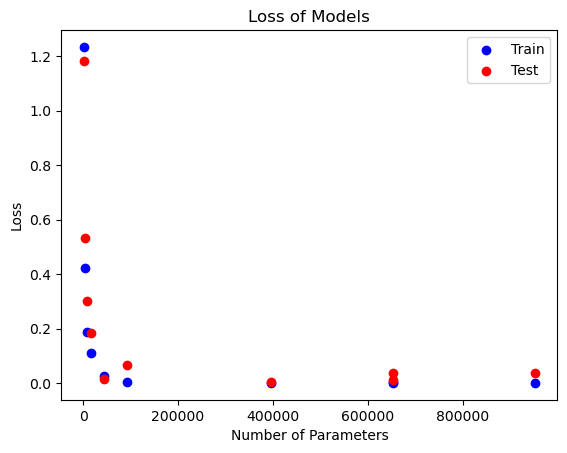

In [139]:
#Training Loss
plt.scatter(model_one_params, train_losses_model_one,c='b',label='Train')
plt.scatter(model_two_params, train_losses_model_two,c='b')
plt.scatter(model_three_params, train_losses_model_three,c='b')
plt.scatter(model_four_params, train_losses_model_four,c='b')
plt.scatter(model_five_params, train_losses_model_five,c='b')
plt.scatter(model_six_params, train_losses_model_six,c='b')
plt.scatter(model_seven_params, train_losses_model_seven,c='b')
plt.scatter(model_eight_params, train_losses_model_eight,c='b')
plt.scatter(model_nine_params, train_losses_model_nine,c='b')
plt.scatter(model_ten_params, train_losses_model_ten,c='b')

#Testing Loss

plt.scatter(model_one_params, test_losses_model_one,c='r',label='Test')
plt.scatter(model_two_params, test_losses_model_two,c='r')
plt.scatter(model_three_params, test_losses_model_three,c='r')
plt.scatter(model_four_params, test_losses_model_four,c='r')
plt.scatter(model_five_params, test_losses_model_five,c='r')
plt.scatter(model_six_params, test_losses_model_six,c='r')
plt.scatter(model_seven_params, test_losses_model_seven,c='r')
plt.scatter(model_eight_params, test_losses_model_eight,c='r')
plt.scatter(model_nine_params, test_losses_model_nine,c='r')
plt.scatter(model_ten_params, test_losses_model_ten,c='r')

plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

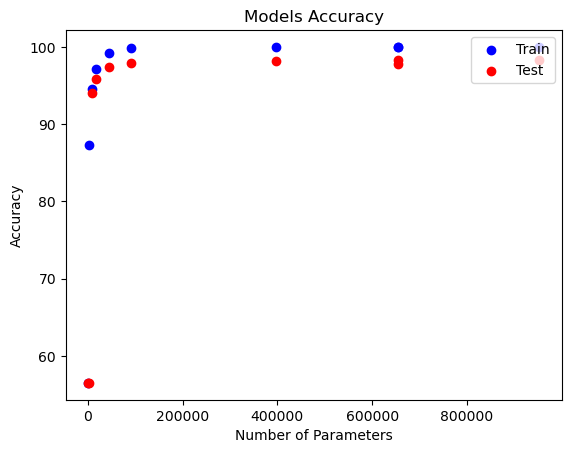

In [135]:
#Training Accuracy
plt.scatter(model_one_params, trn_accu_model_one,c='b',label='Train')
plt.scatter(model_two_params, trn_accu_model_two,c='b')
plt.scatter(model_three_params, trn_accu_model_three,c='b')
plt.scatter(model_four_params, trn_accu_model_four,c='b')
plt.scatter(model_five_params, trn_accu_model_five,c='b')
plt.scatter(model_six_params, trn_accu_model_six,c='b')
plt.scatter(model_seven_params, trn_accu_model_seven,c='b')
plt.scatter(model_eight_params, trn_accu_model_eight,c='b')
plt.scatter(model_nine_params, trn_accu_model_nine,c='b')
plt.scatter(model_ten_params, trn_accu_model_ten,c='b')

#Testing Accuracy

plt.scatter(model_one_params, tst_accu_model_one,c='r',label='Test')
plt.scatter(model_two_params, tst_accu_model_two,c='r')
plt.scatter(model_three_params, tst_accu_model_three,c='r')
plt.scatter(model_four_params, tst_accu_model_four,c='r')
plt.scatter(model_five_params, tst_accu_model_five,c='r')
plt.scatter(model_six_params, tst_accu_model_six,c='r')
plt.scatter(model_seven_params, tst_accu_model_seven,c='r')
plt.scatter(model_eight_params, tst_accu_model_eight,c='r')
plt.scatter(model_nine_params, tst_accu_model_nine,c='r')
plt.scatter(model_ten_params, tst_accu_model_ten,c='r')

plt.title("Models Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()